# <font color = 'silver'> - Theft is the biggest crime in San Fransisco

# <font color = 'silver'>- 12 hours prior to the beginning of a new day, crime incidences rise rapidly

## <font color ='orange'> Importing relevant packages from libraries

In [1]:
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# <font color = 'blue'> Part A - San Fransisco

In [2]:
sanfran_data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', low_memory=False)

## <font color ='blue'> Importing relevant packages from libraries

1. Of all the crime incidences here, **theft/larceny** makes up the most of it.
2. The number of **larceny/theft** cases and the **Vehicle Theft** is more than 40% of all other cases

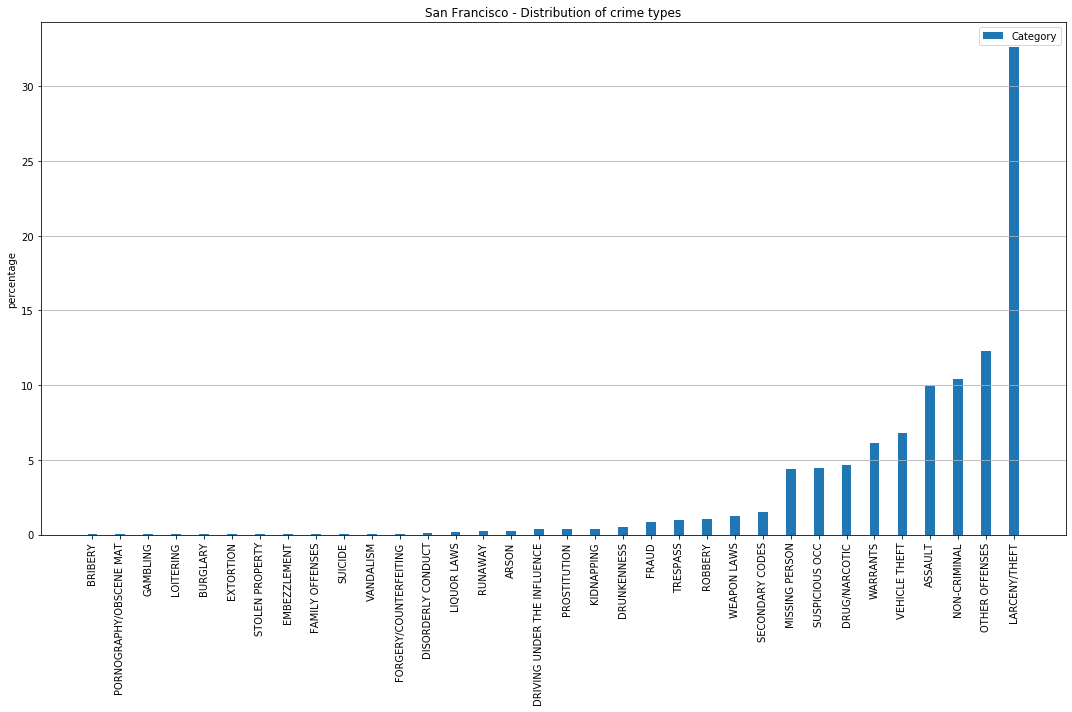

In [3]:
df = sanfran_data.copy(deep=True)
df_pivot = pd.pivot_table(data=df, values='IncidntNum', index='Category', aggfunc='count').reset_index()
df_pivot['percentage'] = 100 * df_pivot['IncidntNum']/df_pivot['IncidntNum'].sum()
df_pivot.sort_values(by='percentage', ascending=True, inplace=True)
df_pivot.reset_index(inplace=True, drop=True)

# creating plot
x_tick_labels = df_pivot['Category'].values
values = df_pivot['percentage'].values

x = np.arange(len(x_tick_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects = ax.bar(x, values, width, label='Category')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('San Francisco - Distribution of crime types')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation='vertical')
ax.legend()
ax.yaxis.grid(b=True, which='both')

fig.tight_layout()

plt.show()

## <font color ='maroon'> How the incidences vary from the different times of day

- From the illustrations below, the rate of crime increases from around noon to midnight

1. From the graph illustration below, San Francisco ; the crimes in in a day(AM{0001-1159}/PM{1200-0000}) we can see that about 70% of the crimes happen in PM
2. Also, considering crimes by time of day, it almost seems like there is a sine wave with crest after 12 PM till midnight and trough elsewhere

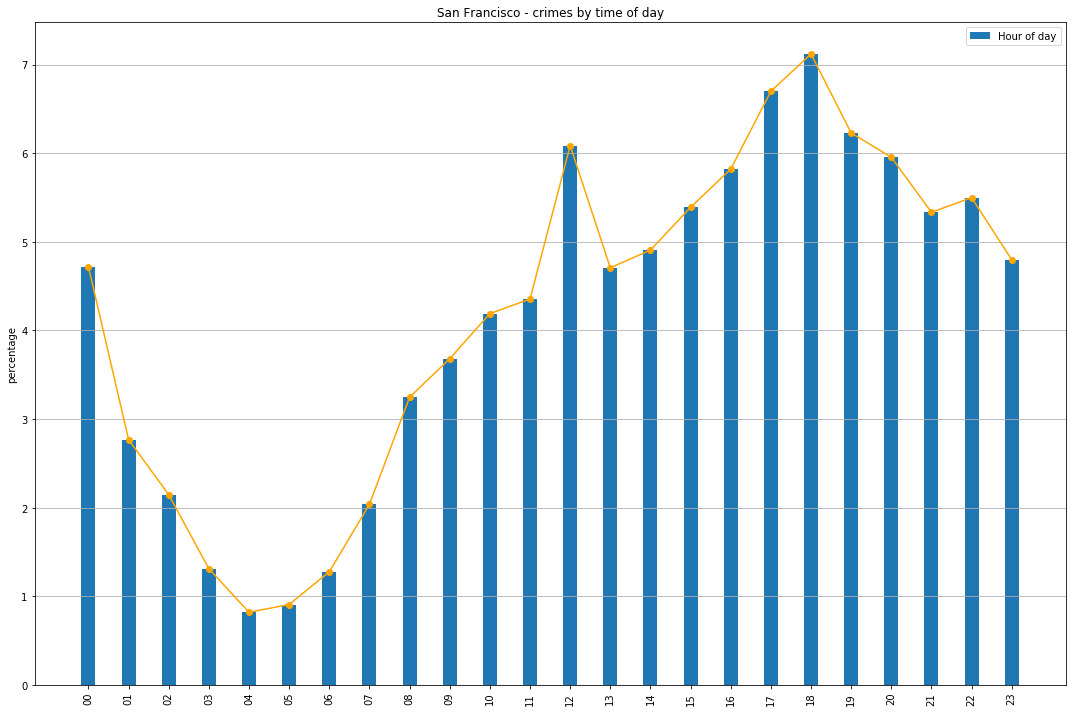

In [4]:
# sanfran - variation of incidents by time of day
# bar plot 

# getting data in the right form
df = sanfran_data.copy(deep=True)
df['Hour'] = df['Time'].str[:2]
df['Half'] = df['Hour'].apply(lambda x: 'AM' if x in [ '11', '10','09','08','07','06','05','04','03','02','01','00'] else 'PM')
df_pivot = pd.pivot_table(data=df, values='IncidntNum', index='Hour', aggfunc=lambda x: len(x.dropna().unique())).reset_index()
df_pivot['percentage'] = 100 * df_pivot['IncidntNum']/df_pivot['IncidntNum'].sum()
df_pivot.sort_values(by='Hour', ascending=True, inplace=True)
df_pivot.reset_index(inplace=True, drop=True)

# creating plot
x_tick_labels = df_pivot['Hour'].values
values = df_pivot['percentage'].values

x = np.arange(len(x_tick_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects = ax.bar(x, values, width, label='Hour of day')
points = ax.plot(x, values, '-o', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('San Francisco - crimes by time of day')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation='vertical')
ax.legend()
ax.yaxis.grid(b=True, which='both')

fig.tight_layout()

plt.show()

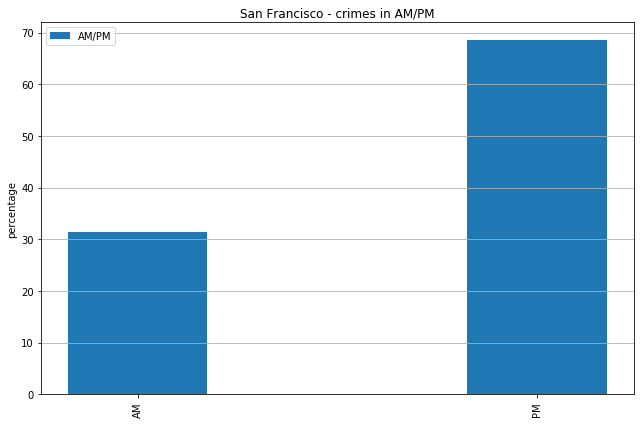

In [5]:
df = sanfran_data.copy(deep=True)
df['Hour'] = df['Time'].str[:2]
df['Half'] = df['Hour'].apply(lambda x: 'AM' if x in [ '11', '10','09','08','07','06','05','04','03','02','01','00'] else 'PM')
df_pivot = pd.pivot_table(data=df, values='IncidntNum', index='Half', aggfunc=lambda x: len(x.dropna().unique())).reset_index()
df_pivot['percentage'] = 100 * df_pivot['IncidntNum']/df_pivot['IncidntNum'].sum()
df_pivot.sort_values(by='Half', ascending=True, inplace=True)
df_pivot.reset_index(inplace=True, drop=True)

# creating plot
x_tick_labels = df_pivot['Half'].values
values = df_pivot['percentage'].values

x = np.arange(len(x_tick_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
rects = ax.bar(x, values, width, label='AM/PM')
# points = ax.plot(x, values, '-o', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('San Francisco - crimes in AM/PM')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation='vertical')
ax.legend()
ax.yaxis.grid(b=True, which='both')

fig.tight_layout()

plt.show()

# <font color='purple'> Considering the different months {Variation by months}

- Looks like there is no significance rise in effect in relation to the months in summer period

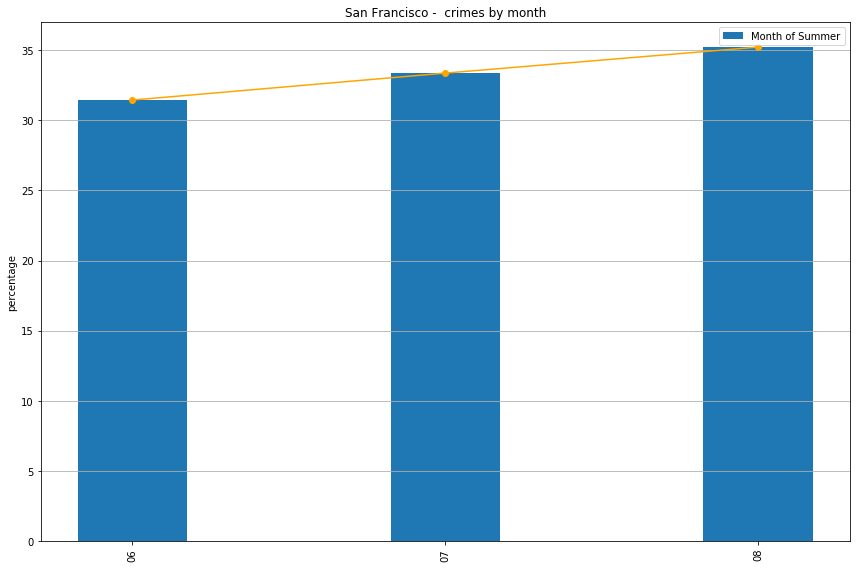

In [6]:
# sanfran - variation of incidents by month
# bar plot 

# getting data in the right form
df = sanfran_data.copy(deep=True)
df['Month'] = df['Date'].str[:2]
df_pivot = pd.pivot_table(data=df, values='IncidntNum', index='Month', aggfunc='count').reset_index()
df_pivot['percentage'] = 100 * df_pivot['IncidntNum']/df_pivot['IncidntNum'].sum()
df_pivot.sort_values(by='Month', ascending=True, inplace=True)
df_pivot.reset_index(inplace=True, drop=True)

# creating plot
x_tick_labels = df_pivot['Month'].values
values = df_pivot['percentage'].values

x = np.arange(len(x_tick_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(x, values, width, label='Month of Summer')
points = ax.plot(x, values, '-o', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('San Francisco -  crimes by month')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation='vertical')
ax.legend()
ax.yaxis.grid(b=True, which='both')

fig.tight_layout()

plt.show()

# <font color = 'blue'> Part B - Seattle

In [7]:
seattle_data = pd.read_csv('seattle_incidents_summer_2014.csv', low_memory=False)

# <font color ='maroon'> Incidents Variation by the time of the day

- Similar to San Francisco, Seattle also sees more crime in PM than AM
1. Based on graph illustartion below, Seattle - Crimes by time of day, higher incident rate occurs from 12 PM to midnight (second half of day)
2. Based on graph illustartion below, Seattle  - Crimes by AM/PM, About 65% of the crimes happen in PM

In [8]:
# preprocessing to format the data
temp = seattle_data.copy(deep=True)
temp['a'] = temp['Occurred Date or Date Range Start'].str[11:]
temp['b'] = temp['a'].str[:2]
temp['c'] = temp['a'].str[9:]

temp['d'] = temp['b'] + temp['c']

hour_dict = {
    '12AM':'00',
    '01AM':'01',
    '02AM':'02',
    '03AM':'03',
    '04AM':'04',
    '05AM':'05',
    '06AM':'06',
    '07AM':'07',
    '08AM':'08',
    '09AM':'09',
    '10AM':'10',
    '11AM':'11',
    '12PM':'12',
    '01PM':'13',
    '02PM':'14',
    '03PM':'15',
    '04PM':'16',
    '05PM':'17',
    '06PM':'18',
    '07PM':'19',
    '08PM':'20',
    '09PM':'21',
    '10PM':'22',
    '11PM':'23'
}

temp['Hour'] = temp['d'].apply(lambda x: hour_dict.get(x,'Unknown Hour'))

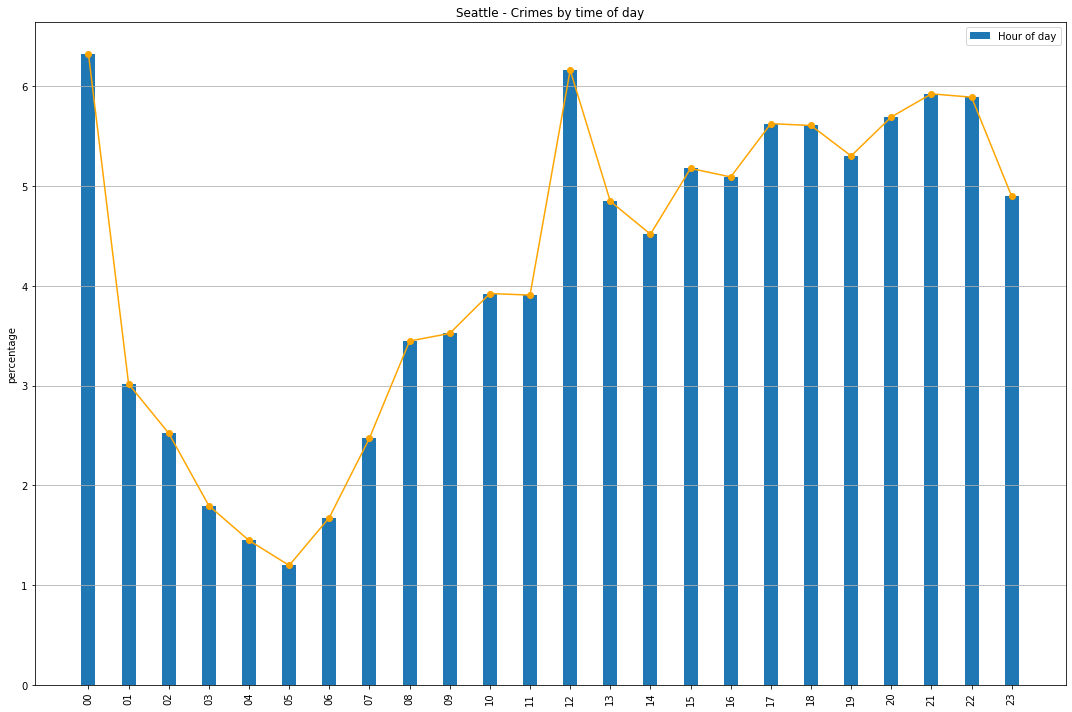

In [9]:
# seattle - variation of incidents by time of day
# bar plot 

# getting data in the right form
df = seattle_data.copy(deep=True)
df['Hour'] = temp['Hour']
df_pivot = pd.pivot_table(data=df, values='RMS CDW ID', index='Hour', aggfunc='count').reset_index()
df_pivot['percentage'] = 100 * df_pivot['RMS CDW ID']/df_pivot['RMS CDW ID'].sum()
df_pivot.sort_values(by='Hour', ascending=True, inplace=True)
df_pivot.reset_index(inplace=True, drop=True)

# creating plot
x_tick_labels = df_pivot['Hour'].values
values = df_pivot['percentage'].values

x = np.arange(len(x_tick_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects = ax.bar(x, values, width, label='Hour of day')
points = ax.plot(x, values, '-o', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('Seattle - Crimes by time of day')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation='vertical')
ax.legend()
ax.yaxis.grid(b=True, which='both')

fig.tight_layout()

plt.show()

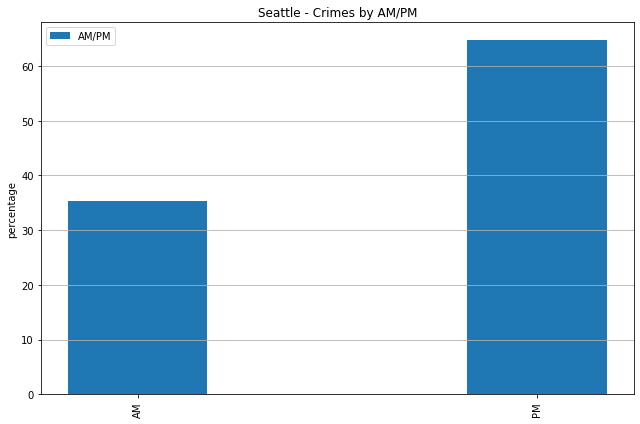

In [10]:
# seattle - variation of incidents by time of day
# bar plot 

# getting data in the right form
df = seattle_data.copy(deep=True)
df['Hour'] = temp['Hour']
df['Half'] = df['Hour'].apply(lambda x: 'AM' if x in [ '11', '10','09','08','07','06','05','04','03','02','01','00'] else 'PM')
df_pivot = pd.pivot_table(data=df, values='RMS CDW ID', index='Half', aggfunc='count').reset_index()
df_pivot['percentage'] = 100 * df_pivot['RMS CDW ID']/df_pivot['RMS CDW ID'].sum()
df_pivot.sort_values(by='Half', ascending=True, inplace=True)
df_pivot.reset_index(inplace=True, drop=True)

# creating plot
x_tick_labels = df_pivot['Half'].values
values = df_pivot['percentage'].values

x = np.arange(len(x_tick_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
rects = ax.bar(x, values, width, label='AM/PM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('Seattle - Crimes by AM/PM')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation='vertical')
ax.legend()
ax.yaxis.grid(b=True, which='both')

fig.tight_layout()

plt.show()